In [91]:
#Importing important scripts for analysis
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import pearsonr
import statsmodels.api as sm

In [114]:
#Importing life_expectancy_gdp file into enviroment
life_expectancy_gdp = pd.read_csv('all_data.csv')

#Inspecting first 5 rows of data
life_expectancy_gdp.head(5)

  Country  Year  Life_expectancy_at_birth_years           GDP
0   Chile  2000                            77.3  7.786093e+10
1   Chile  2001                            77.3  7.097992e+10
2   Chile  2002                            77.8  6.973681e+10
3   Chile  2003                            77.9  7.564346e+10
4   Chile  2004                            78.0  9.921039e+10


In [125]:
#Rename column 'life expectancy at birth (years)'to remove spaces
life_expectancy_gdp.rename(columns ={'Life expectancy at birth (years)':'Life_expectancy_at_birth_years' }, inplace = True)

print(life_expectancy_gdp.head())

  Country  Year  Life_expectancy_at_birth_years           GDP
0   Chile  2000                            77.3  7.786093e+10
1   Chile  2001                            77.3  7.097992e+10
2   Chile  2002                            77.8  6.973681e+10
3   Chile  2003                            77.9  7.564346e+10
4   Chile  2004                            78.0  9.921039e+10


In [126]:
#Checking data information for missing data
print(life_expectancy_gdp.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Country                         96 non-null     object 
 1   Year                            96 non-null     int64  
 2   Life_expectancy_at_birth_years  96 non-null     float64
 3   GDP                             96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB
None


In [127]:
print(life_expectancy_gdp['Life_expectancy_at_birth_years'].unique())

[77.3 77.8 77.9 78.  78.4 78.9 79.6 79.3 79.1 79.8 79.9 80.1 80.3 80.5
 71.7 72.2 72.7 73.1 73.5 73.9 74.2 74.4 74.5 74.9 75.  75.2 75.4 75.6
 75.8 76.1 78.3 78.5 79.2 80.  80.6 80.9 81.  74.8 75.3 76.  75.7 76.3
 76.6 76.7 76.8 76.9 77.  77.2 77.5 78.1 78.2 78.7 78.8 46.  45.3 44.8
 44.5 44.3 44.6 45.4 46.6 48.2 50.  52.4 54.9 56.6 58.  59.2 60.7]


In [128]:
#Describing data
print(life_expectancy_gdp.describe())

              Year  Life_expectancy_at_birth_years           GDP
count    96.000000                       96.000000  9.600000e+01
mean   2007.500000                       72.789583  3.880499e+12
std       4.633971                       10.672882  5.197561e+12
min    2000.000000                       44.300000  4.415703e+09
25%    2003.750000                       74.475000  1.733018e+11
50%    2007.500000                       76.750000  1.280220e+12
75%    2011.250000                       78.900000  4.067510e+12
max    2015.000000                       81.000000  1.810000e+13


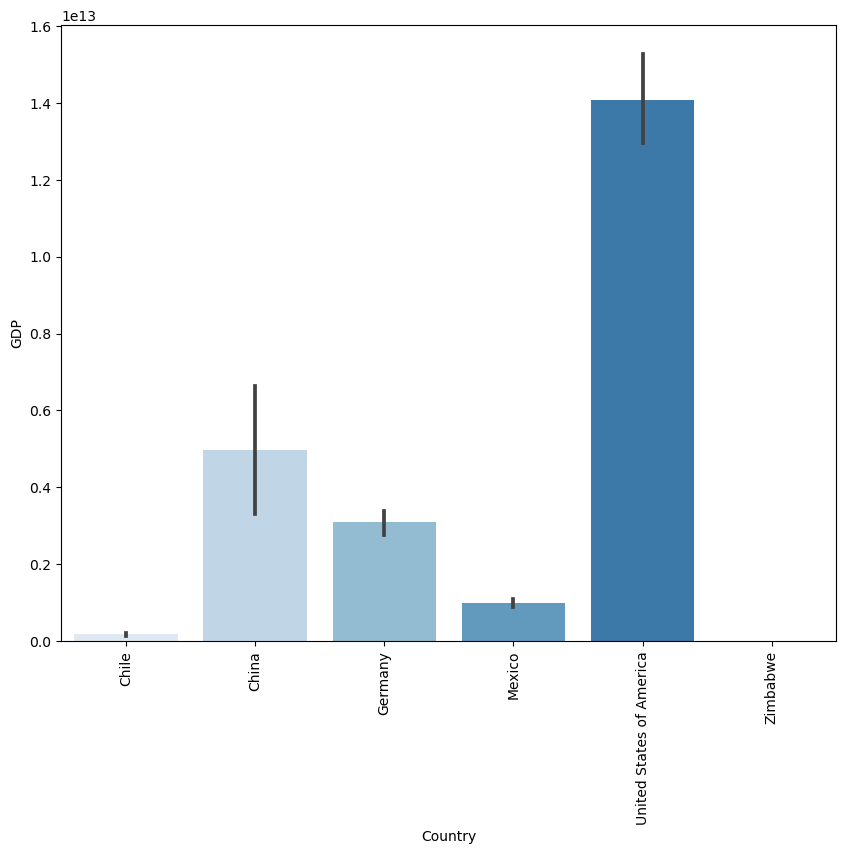

In [129]:
#Visualizing the GDP across countries
plt.figure(figsize=(10, 8)) 
ax= plt.subplot()
sns.barplot(x = 'Country', y = 'GDP', data = life_expectancy_gdp,  palette = 'Blues')
plt.xticks(rotation = 90)
plt.show()

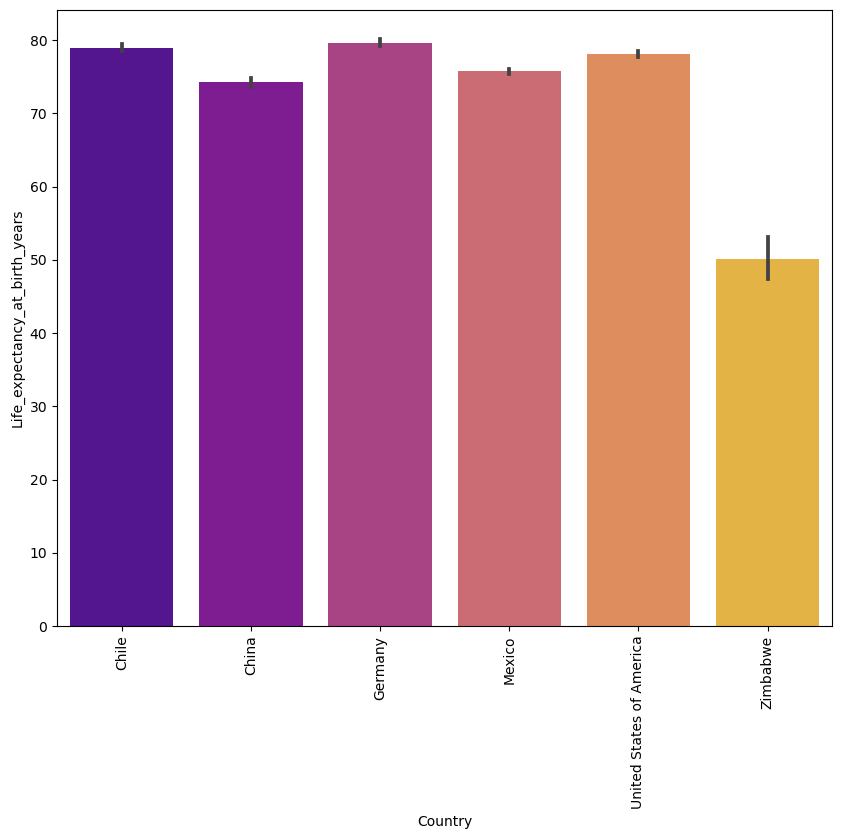

In [130]:
#Visualizing the life expectancy across countries
plt.figure(figsize=(10, 8)) 
sns.barplot(x = 'Country', y = 'Life_expectancy_at_birth_years', data = life_expectancy_gdp,  palette = 'plasma')
plt.xticks(rotation = 90)
plt.show()

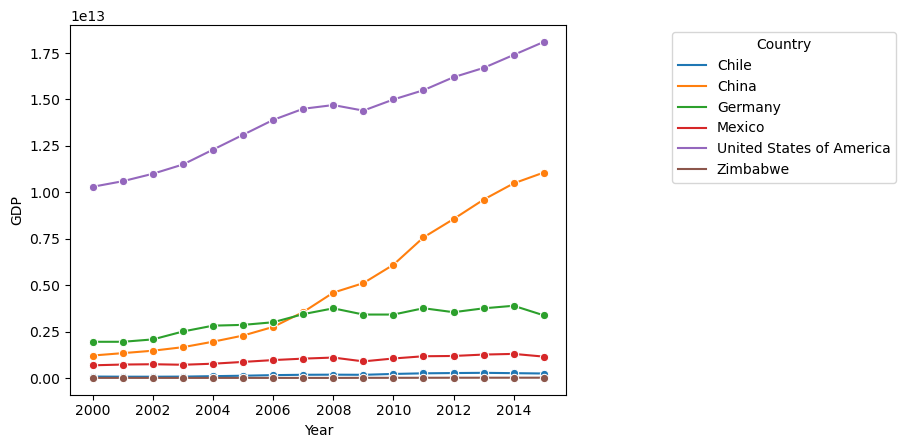

In [131]:
#GDP of each countries accross years
sns.lineplot(x = 'Year', y = 'GDP', hue = 'Country', data = life_expectancy_gdp, marker = 'o')
plt.legend(title='Country', bbox_to_anchor=(1.2, 1), loc='upper left') 
plt.show()

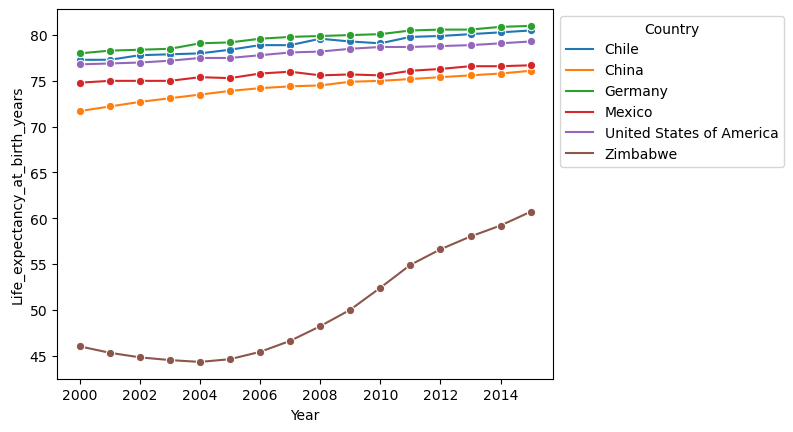

In [132]:
#Life expectancy of each countries accross years
sns.lineplot(x = 'Year', y = 'Life_expectancy_at_birth_years', hue = 'Country', data = life_expectancy_gdp, marker = 'o')
plt.legend(title='Country', bbox_to_anchor=(1, 1), loc='upper left') 
plt.show()


/Users/zg/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


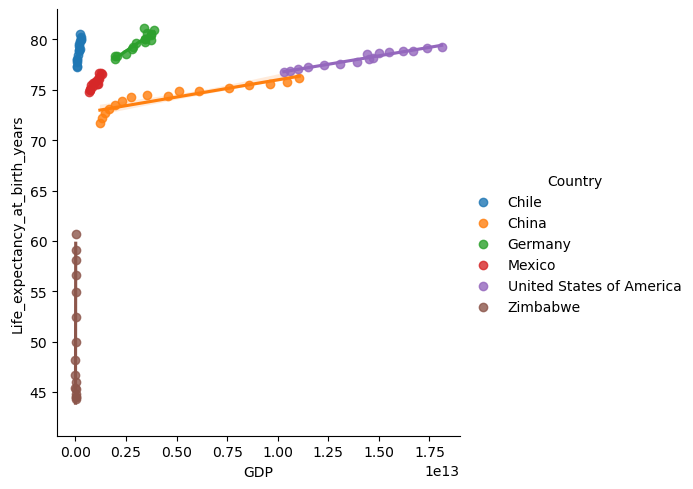

In [133]:
#Relationship between life expectancy and GDP for each countries
sns.lmplot(x = 'GDP', y = 'Life_expectancy_at_birth_years',hue ='Country', data = life_expectancy_gdp, x_jitter =.1, y_jitter = .1)
plt.show()

/Users/zg/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


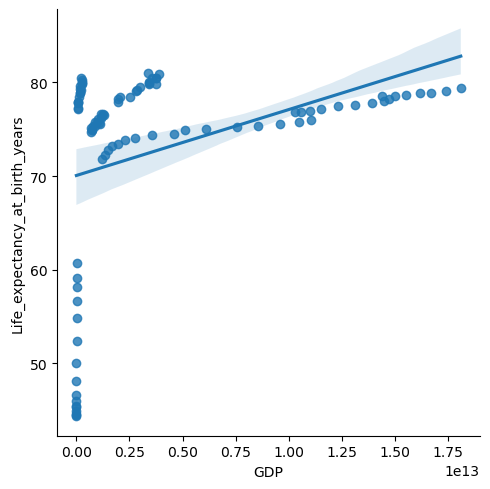

In [134]:
#Overall Relationship between life expectancy and GDP
sns.lmplot(x = 'GDP', y = 'Life_expectancy_at_birth_years', data = life_expectancy_gdp, x_jitter =.1, y_jitter = .1)
plt.show()

In [135]:
#Finding the strength of the relationship between life expectancy and GDP
life_expectancy_gdp.corr, p = pearsonr(life_expectancy_gdp['Life_expectancy_at_birth_years'], life_expectancy_gdp['GDP'] )
print(life_expectancy_gdp.corr)

0.343206748449156


In [136]:
#Fitting an OLS Linear Regression Model to understand the relationship between life expectancy and GDP
model = sm.OLS.from_formula("Life_expectancy_at_birth_years ~ GDP", data = life_expectancy_gdp)
results = model.fit()
results.params

Intercept    7.005478e+01
GDP          7.047546e-13
dtype: float64

In [137]:
#Calculating fitted and residual values
fitted_values = results.predict(life_expectancy_gdp)
print(fitted_values.head())

residuals = life_expectancy_gdp['Life_expectancy_at_birth_years'] - fitted_values
print(residuals.head())

0    70.109657
1    70.104808
2    70.103931
3    70.108094
4    70.124703
dtype: float64
0    7.190343
1    7.195192
2    7.696069
3    7.791906
4    7.875297
dtype: float64


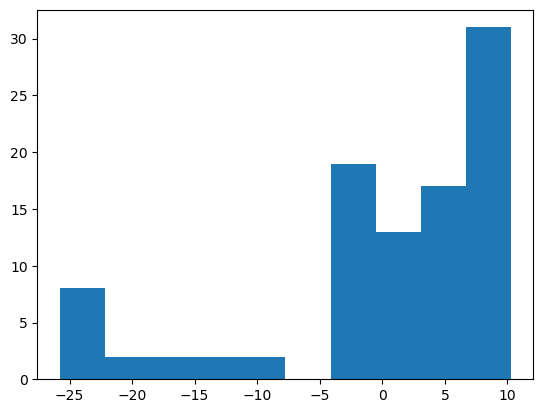

In [138]:
#Testing for normality
plt.hist(residuals)
plt.show()

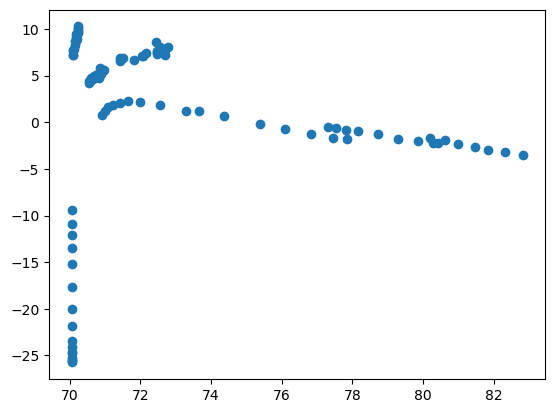

In [139]:
#Test for homoscedasticity
plt.scatter(fitted_values, residuals)
plt.show()